In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
df= pd.read_csv('train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S
67,68,0,3,"Crease, Mr. Ernest James",male,19.0,0,0,S.P. 3464,8.1583,NaN,S
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,NaN,Q
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.7750,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.duplicated().sum()

0

In [ ]:
#df.corr()['survived']

In [ ]:
df.drop(['PassengerId'],axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df=df.drop(['Cabin','Name', 'SibSp', 'Parch','Ticket','Cabin','Embarked','PassengerId'],axis=1)

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [ ]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.000000,7.2500
1,1,1,female,38.000000,71.2833
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
...,...,...,...,...,...
886,0,2,male,27.000000,13.0000
887,1,1,female,19.000000,30.0000
888,0,3,female,29.699118,23.4500
889,1,1,male,26.000000,30.0000


In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [ ]:
print(df['Survived'].value_counts())


Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

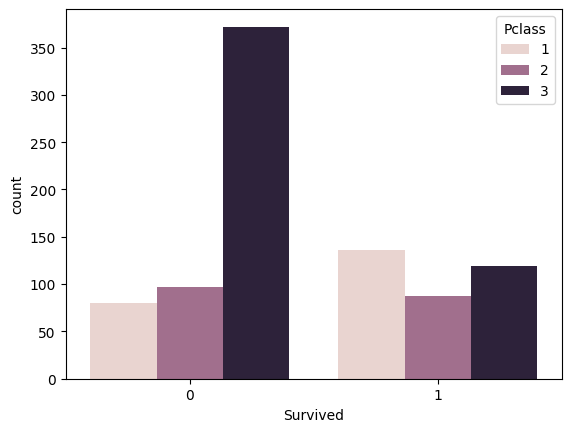

In [ ]:
sns.countplot(data=df, x='Survived', hue='Pclass')


<Axes: xlabel='Survived', ylabel='count'>

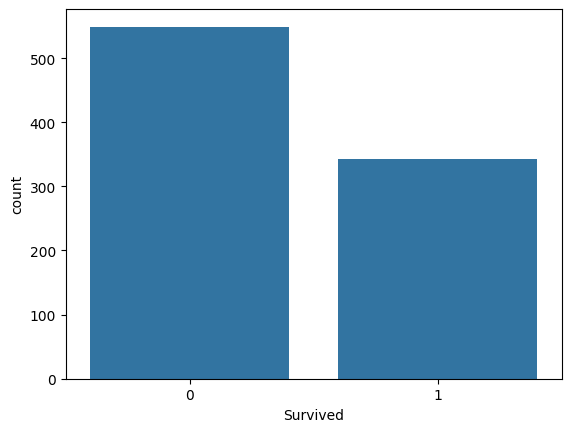

In [ ]:
sns.countplot(x='Survived', data=df)


<Axes: xlabel='Sex', ylabel='count'>

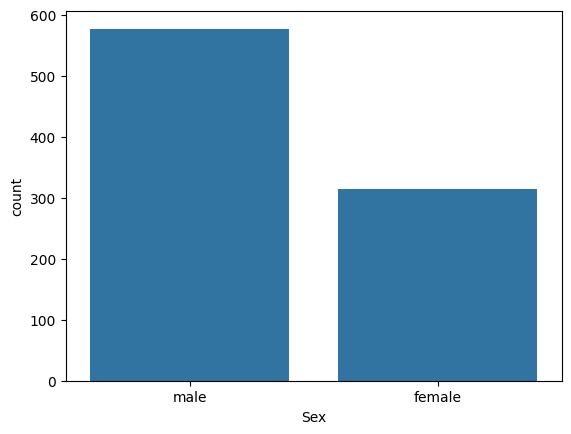

In [ ]:
sns.countplot(x='Sex', data=df)


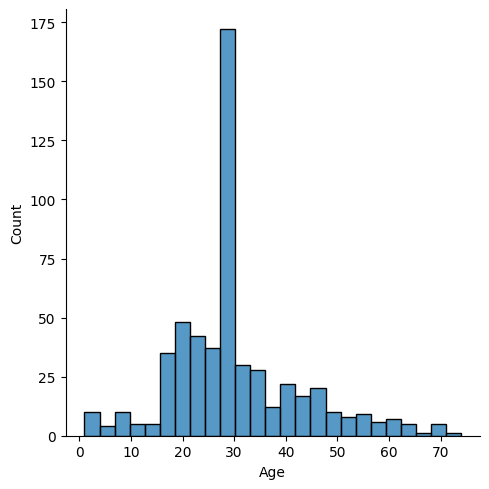

In [ ]:
sns.displot(df[df['Survived']==0]['Age'])


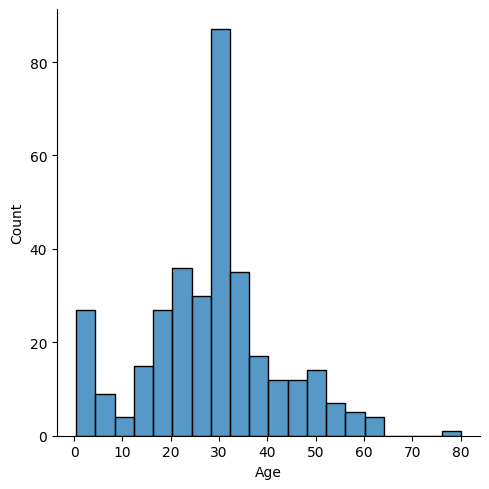

In [ ]:
sns.displot(df[df['Survived']==1]['Age'])

In [ ]:
def changetoint64(col):
    for i in col:
        df[i] = df[i].astype('int64')
        
columns =[
    'Age','Fare'
]
changetoint64(columns)

In [ ]:
# transformer = ColumnTransformer(
#     transformers=[
#         ('tnf1', OneHotEncoder(sparse_output=False, drop='first'), ['Sex'])
#     ],
#     remainder='passthrough'
# )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Age       891 non-null    int64 
 4   Fare      891 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 34.9+ KB


In [ ]:
df=df.drop('Fare',axis=1)


In [ ]:
df_encoded = df.copy()

In [ ]:
def encodeCols(cols):
    for i in cols:
        data = pd.DataFrame({i:df[i].unique()})
        data_label_encoder = LabelEncoder()
        data_label_encoder.fit(np.ravel(data))
        df_encoded[i] = data_label_encoder.transform(df[i]) 
columns = ['Survived','Pclass','Sex','Age']
encodeCols(columns)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int32
 3   Age       891 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 24.5 KB


In [ ]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [ ]:
X = df[['Pclass', 'Sex', 'Age']]
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,Pclass,Sex,Age
445,1,1,4
650,3,1,29
172,3,0,1
450,2,1,36
314,2,1,43


## classifiers

## Random Forest

In [ ]:
RF = RandomForestClassifier()

In [ ]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
Y_pred = RF.predict(X_test)
r_accuracy = accuracy_score(y_test, Y_pred)

In [ ]:
print('Accuracy: %f' % r_accuracy)
r_precision = metrics.precision_score(y_test, Y_pred, average='weighted', 
labels=np.unique(Y_pred))
print('Precision: %f' % r_precision)
r_recall = metrics.recall_score(y_test, Y_pred, average='weighted', labels=np.unique(Y_pred))
print('Recall: %f' % r_recall)
r_f1 = metrics.f1_score(y_test, Y_pred, average='weighted', labels=np.unique(Y_pred))
print('F1 score: %f' % r_f1)

Accuracy: 0.794776
Precision: 0.795079
Recall: 0.794776
F1 score: 0.791537


# GaussianNB

In [ ]:
GNB = GaussianNB()

In [ ]:
GNB.fit(X_train,y_train)


GaussianNB()

In [ ]:
Y_pred = GNB.predict(X_test)

In [ ]:
g_accuracy = accuracy_score(y_test, Y_pred)
print('Accuracy: %f' % g_accuracy)
g_precision = metrics.precision_score(y_test, Y_pred, average='weighted', 
labels=np.unique(Y_pred))
print('Precision: %f' % g_precision)
g_recall = metrics.recall_score(y_test, Y_pred, average='weighted', labels=np.unique(Y_pred))
print('Recall: %f' % g_recall)
g_f1 = metrics.f1_score(y_test, Y_pred, average='weighted', labels=np.unique(Y_pred))
print('F1 score: %f' % g_f1)

Accuracy: 0.772388
Precision: 0.771621
Recall: 0.772388
F1 score: 0.771906


# Decision Tree

In [ ]:
DT = DecisionTreeClassifier()


In [ ]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred = DT.predict(X_test)

In [ ]:
d_accuracy = accuracy_score(y_test, Y_pred)
print('Accuracy: %f' % d_accuracy)
d_precision = metrics.precision_score(y_test, Y_pred, average='weighted', 
labels=np.unique(Y_pred))
print('Precision: %f' % d_precision)
d_recall = metrics.recall_score(y_test, Y_pred, average='weighted', labels=np.unique(Y_pred))
print('Recall: %f' % d_recall)
d_f1 = metrics.f1_score(y_test, Y_pred, average='weighted', labels=np.unique(Y_pred))
print('F1 score: %f' % d_f1)

Accuracy: 0.776119
Precision: 0.777397
Recall: 0.776119
F1 score: 0.771135


## Logistic Regression

In [ ]:
LR= LogisticRegression()

In [ ]:
LR.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred_lr= LR.predict(X_test)

In [ ]:
print(X_train.shape)  # Training data shape
print(X_test.shape)  # Test data shape


(623, 3)
(268, 3)


In [ ]:
LR.score(X_test,y_test)

0.8097014925373134

In [ ]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [ ]:
test_data=pd.read_csv('test.csv')